In [27]:
import quandl
import pandas as pd
import numpy as np
import datetime

In [3]:
## HIDE WARNING MESSAGES
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [4]:
key = pd.read_csv('~/code_projects/quandl_key.txt', sep=" ", header=None)
quandl.ApiConfig.api_key = key.iloc[0,0]

# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call

data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2014-05-01', 'lte': '2019-05-01' }, 
                        paginate=True)
data.head()

,ticker,date,adj_close
None,,,
0,AAPL,2018-03-27,168.340
1,AAPL,2018-03-26,172.770
2,AAPL,2018-03-23,164.940
3,AAPL,2018-03-22,168.845
4,AAPL,2018-03-21,171.270


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache using fc-list. This may take a moment.


In [6]:
data["pct_change"] = data["adj_close"].pct_change()
data["log_returns"] = np.log(1 + data["pct_change"])
data.dropna(inplace=True)
data = data.reset_index(drop=True)
#data.drop()
data.head()

,ticker,date,adj_close,pct_change,log_returns
0,AAPL,2018-03-26,172.770,0.026316,0.025975
1,AAPL,2018-03-23,164.940,-0.045320,-0.046379
2,AAPL,2018-03-22,168.845,0.023675,0.023399
3,AAPL,2018-03-21,171.270,0.014362,0.014260
4,AAPL,2018-03-20,175.240,0.023180,0.022915


/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


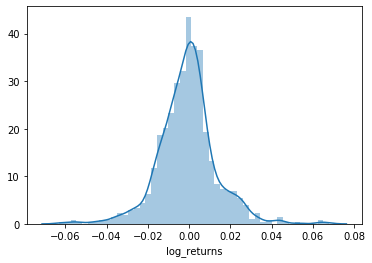

In [7]:
%matplotlib inline

sns.distplot(data["log_returns"])

In [8]:
lower_percentile = 5.0
upper_percentile = 95.0

lower_bound = np.percentile(data["log_returns"].values, lower_percentile)
upper_bound = np.percentile(data["log_returns"].values, upper_percentile)

In [9]:
## GET TRADE TYPE
def _get_bound(row):
    if row["log_returns"] < lower_bound:
        return "buy"
    elif row["log_returns"] > upper_bound:
        return "sell"
    else:
        return "hold"
    
data["trade_type"] = data.apply(_get_bound, axis = 1)

In [10]:
data.head()

,ticker,date,adj_close,pct_change,log_returns,trade_type
0,AAPL,2018-03-26,172.770,0.026316,0.025975,sell
1,AAPL,2018-03-23,164.940,-0.045320,-0.046379,buy
2,AAPL,2018-03-22,168.845,0.023675,0.023399,sell
3,AAPL,2018-03-21,171.270,0.014362,0.014260,hold
4,AAPL,2018-03-20,175.240,0.023180,0.022915,hold


In [11]:
plot_cols = ["date","adj_close","trade_type"]
plot_data = data[plot_cols]
plot_data.head()

,date,adj_close,trade_type
0,2018-03-26,172.770,sell
1,2018-03-23,164.940,buy
2,2018-03-22,168.845,sell
3,2018-03-21,171.270,hold
4,2018-03-20,175.240,hold


(735354.0, 736844.0)

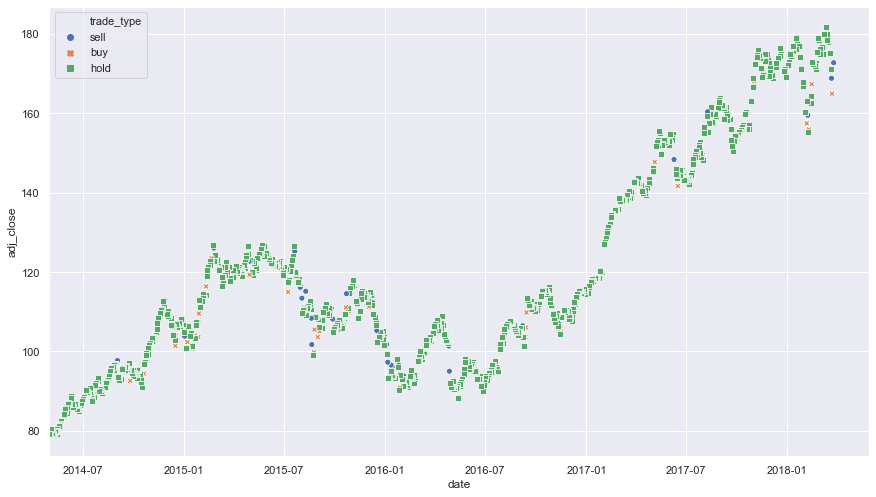

In [39]:
start_date = datetime.date(2014, 5, 1)
end_date = datetime.date(2018, 5, 30)
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.set()
axplot = sns.scatterplot(x="date", y="adj_close", hue = "trade_type",
                style = "trade_type", data=plot_data)

axplot.set_xlim([start_date, end_date])